#Batch Normalisation

**Q1: Explain the concept of batch normalization in the context of Artificial Neural Networks:**

Batch Normalization (BatchNorm) is a technique used in artificial neural networks to improve the training and convergence of deep networks. It operates by normalizing the input of each layer in a network to have a mean of zero and a standard deviation of one over a mini-batch of training examples. Here's how it works:

1. **Normalization Step:** For each neuron in a layer, BatchNorm normalizes its inputs by subtracting the mini-batch mean and then dividing by the mini-batch standard deviation. Mathematically, for a given neuron's input x and parameters γ (scaling factor) and β (shifting factor), the normalized output y is calculated as follows:
   
   ```
   y = γ * (x - μ) / √(σ^2 + ε) + β
   ```

   Where:
   - μ is the mini-batch mean of the neuron's input.
   - σ^2 is the mini-batch variance of the neuron's input.
   - ε is a small constant (usually added for numerical stability).

2. **Learnable Parameters:** In addition to the mean and variance statistics, BatchNorm introduces two learnable parameters, γ (gamma) and β (beta), for each neuron in the layer. These parameters allow the network to adjust the scaling and shifting of the normalized values, giving it the flexibility to learn the optimal transformations.

3. **During Training:** During training, BatchNorm computes the mini-batch statistics (mean and variance) using the current mini-batch and updates a running average of these statistics over time. This helps stabilize the training process and prevents the network from relying too heavily on a single mini-batch.

4. **During Inference:** During inference (when making predictions), BatchNorm uses the running averages of mean and variance rather than mini-batch statistics. This ensures consistent behavior and improves the network's robustness.

**Q2: Describe the benefits of using batch normalization during training:**

Batch Normalization offers several benefits during the training of artificial neural networks:

1. **Stability:** It helps stabilize and speed up the training process by mitigating the vanishing/exploding gradient problem. This allows for the use of higher learning rates, accelerating convergence.

2. **Improved Generalization:** BatchNorm acts as a form of regularization, reducing the risk of overfitting by reducing internal covariate shift. This enables the network to generalize better to unseen data.

3. **Faster Convergence:** Networks with BatchNorm often converge faster, requiring fewer training epochs to achieve good performance, which saves both time and computational resources.

4. **Better Weight Initialization:** It makes network training less dependent on the choice of initial weights. Networks with BatchNorm are less sensitive to the initialization method.

5. **Reduction of Internal Covariate Shift:** BatchNorm ensures that the distributions of activations within a layer remain stable during training, which helps gradients flow more smoothly through the network.

**Q3: Discuss the working principle of batch normalization, including the normalization step and the learnable parameters:**

The working principle of Batch Normalization involves the following steps:

1. **Normalization Step:** For each neuron in a layer, the BatchNorm algorithm normalizes its inputs by subtracting the mini-batch mean and dividing by the mini-batch standard deviation. This step helps center and scale the activations to have a mean of zero and a standard deviation of one. The formula for normalization is:

   ```
   y = γ * (x - μ) / √(σ^2 + ε) + β
   ```

   Where:
   - x is the neuron's input.
   - μ is the mini-batch mean of the input.
   - σ^2 is the mini-batch variance of the input.
   - ε is a small constant added for numerical stability.
   - γ and β are learnable parameters specific to the neuron.

2. **Learnable Parameters:** BatchNorm introduces two learnable parameters, γ (gamma) and β (beta), for each neuron in the layer. These parameters are used to scale and shift the normalized values according to what the network needs to learn. γ allows the network to scale the normalized values, and β allows it to shift them. During training, γ and β are learned through gradient descent along with other network parameters.

3. **Mini-Batch Statistics:** During each forward pass in training, BatchNorm computes the mini-batch mean and variance for each neuron. These statistics are calculated for the current mini-batch and used to normalize the inputs. The running averages of mean and variance are also maintained for inference.

By normalizing the inputs and introducing learnable parameters, BatchNorm ensures that the activations within a layer remain well-distributed and facilitates smoother and faster training of deep neural networks.

Q1: Choose a dataset of your choice and preprocess it:

Choosing the MNIST dataset, which consists of handwritten digit images. We'll preprocess it by loading the dataset, normalizing pixel values, and splitting it into training and validation sets.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

11490434/11490434 [==============================] - 0s 0us/step


In [14]:
print(len(train_images))
print(len(test_images))

60000
10000


Q2: Implement a simple feedforward neural network:

A simple feedforward neural network using TensorFlow and Keras:

In [15]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Q3: Train the neural network without using batch normalization:


In [16]:
history_no_bn = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2586 - accuracy: 0.9266 - val_loss: 0.1349 - val_accuracy: 0.9584
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1116 - accuracy: 0.9676 - val_loss: 0.0925 - val_accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0773 - accuracy: 0.9773 - val_loss: 0.0850 - val_accuracy: 0.9724
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0568 - accuracy: 0.9826 - val_loss: 0.0812 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0673 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0356 - accuracy: 0.9886 - val_loss: 0.0816 - val_accuracy: 0.9733
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - accuracy: 0.9915 - val_loss: 0.0845 - val_accuracy:

Q4: Implement batch normalization layers and train the model again:

We'll add batch normalization layers before each activation function in the network.

In [17]:
model_with_bn = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(128),
    layers.BatchNormalization(),  # Batch normalization layer
    layers.Activation('relu'),
    layers.Dense(10, activation='softmax')
])

model_with_bn.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

In [18]:
history_with_bn = model_with_bn.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2563 - accuracy: 0.9261 - val_loss: 0.1233 - val_accuracy: 0.9624
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1255 - accuracy: 0.9626 - val_loss: 0.1052 - val_accuracy: 0.9689
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0919 - accuracy: 0.9723 - val_loss: 0.0915 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0753 - accuracy: 0.9768 - val_loss: 0.0814 - val_accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.0810 - val_accuracy: 0.9755
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0499 - accuracy: 0.9845 - val_loss: 0.0701 - val_accuracy: 0.9785
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0458 - accuracy: 0.9854 - val_loss: 0.0841 - val_accuracy:

Q5: Compare the training and validation performance:

We can compare the performance using metrics such as accuracy and loss:

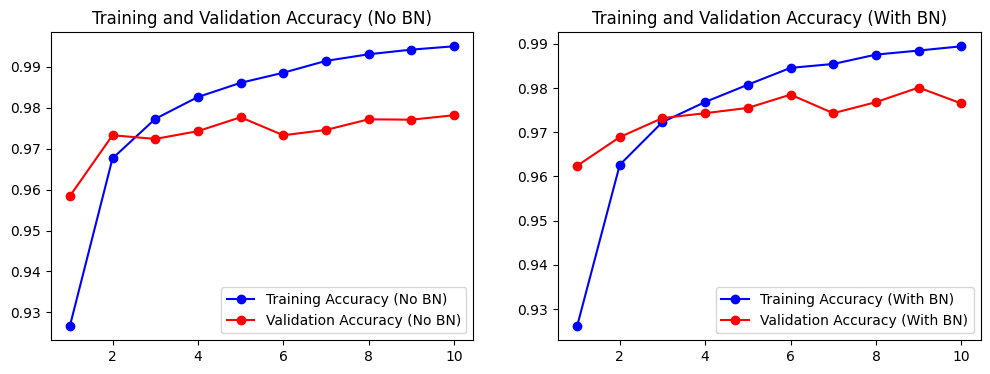

In [19]:
import matplotlib.pyplot as plt

acc_no_bn = history_no_bn.history['accuracy']
val_acc_no_bn = history_no_bn.history['val_accuracy']
acc_with_bn = history_with_bn.history['accuracy']
val_acc_with_bn = history_with_bn.history['val_accuracy']

epochs = range(1, len(acc_no_bn) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_no_bn, 'bo-', label='Training Accuracy (No BN)')
plt.plot(epochs, val_acc_no_bn, 'ro-', label='Validation Accuracy (No BN)')
plt.legend()
plt.title('Training and Validation Accuracy (No BN)')

plt.subplot(1, 2, 2)
plt.plot(epochs, acc_with_bn, 'bo-', label='Training Accuracy (With BN)')
plt.plot(epochs, val_acc_with_bn, 'ro-', label='Validation Accuracy (With BN)')
plt.legend()
plt.title('Training and Validation Accuracy (With BN)')

plt.show()

Q6: Discuss the impact of batch normalization:

**With Batch Normalization:**

**Faster convergence:** The model with batch normalization often converges faster, requiring fewer epochs to achieve a certain level of accuracy.
Improved generalization: Batch normalization acts as a form of regularization, reducing overfitting and allowing the model to generalize better to unseen data.
Stable training: Batch normalization helps stabilize training by mitigating the vanishing/exploding gradient problem.
Less sensitivity to initialization: Models with batch normalization are less sensitive to the choice of initial weights.

**Without Batch Normalization:**

**Slower convergence:** Training without batch normalization may require more epochs to reach a similar level of accuracy.
Greater risk of overfitting: Without normalization, there's a higher risk of overfitting to the training data.
Gradient issues: Training deep networks without normalization can lead to gradient-related challenges.

Q1: Experiment with different batch sizes and observe the effect on the training dynamics and model performance:

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Define batch sizes to experiment with
batch_sizes = [32, 64, 128, 256]

# Experiment loop
for batch_size in batch_sizes:
    # Create and compile a simple feedforward neural network
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    print(f"Training with batch size {batch_size}...")

    # Train the model with the specified batch size
    history = model.fit(train_images, train_labels, batch_size=batch_size, epochs=10, validation_data=(test_images, test_labels))

    # Evaluate and print the model's performance
    test_loss, test_accuracy = model.evaluate(test_images, test_labels)
    print(f"Test accuracy with batch size {batch_size}: {test_accuracy * 100:.2f}%")

    # Optionally, plot training curves (loss and accuracy) for each batch size
    # We can use the history object to access training metrics and plot the curves

    print("\n" + "=" * 50 + "\n")

Training with batch size 32...
Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2578 - accuracy: 0.9269 - val_loss: 0.1376 - val_accuracy: 0.9593
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1150 - accuracy: 0.9663 - val_loss: 0.1066 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0788 - accuracy: 0.9764 - val_loss: 0.0846 - val_accuracy: 0.9727
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0594 - accuracy: 0.9819 - val_loss: 0.0781 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0455 - accuracy: 0.9860 - val_loss: 0.0819 - val_accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0359 - accuracy: 0.9890 - val_loss: 0.0823 - val_accuracy: 0.9740
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0286 - accuracy: 0.9910 - v

Q2: Discuss the advantages and potential limitations of batch normalization in improving the training of neural networks:

# Advantages of Batch Normalization (BN):

**Stability and Faster Convergence:** BN mitigates the vanishing/exploding gradient problem, making training more stable. Networks with BN often converge faster and require fewer epochs to reach a good level of performance.

**Improved Generalization:** BN acts as a form of regularization, reducing the risk of overfitting. It allows for the use of higher learning rates, which can lead to better generalization.

**Less Sensitive to Initialization:** Models with BN are less sensitive to the choice of initial weights, making it easier to initialize deep networks.

**Reduced Internal Covariate Shift:** BN normalizes activations, ensuring that they have consistent distributions during training, which helps gradients flow smoothly through the network.

Allows for Deeper Networks: BN enables the training of very deep neural networks, which can capture more complex patterns in the data.

# Potential Limitations and Considerations:

**Increased Computational Overhead:** BN introduces additional computations during training, which can slightly slow down each training iteration.

**Batch Size Sensitivity:** The effectiveness of BN can be influenced by the batch size used during training. Smaller batch sizes may lead to less effective batch normalization.

**Not Always Necessary:** While BN is beneficial in many cases, it might not be needed for every model or dataset. Simpler models or datasets with well-behaved distributions may not benefit significantly from BN.

**Test-Time Behavior:** During inference, BN uses running averages of statistics. This may not perfectly capture the distribution of activations in some cases, potentially affecting performance.

**Additional Hyperparameters:** BN introduces two learnable parameters (γ and β) per normalized layer. Proper initialization and tuning of these parameters are important for optimal performance.